In [334]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [158]:
def f(row):
    if row[41] == 'teardrop' or row[41] == 'back' or row[41] == 'land' or row[41] == 'pod' or row[41] == 'smurf' or row[41] == 'neptune' or row[41] == 'apache2' or row[41] == 'worm' or row[41] == 'udpstorm' or row[41] == 'processtable':
        return 'dos'
    if row[41] == 'saint' or row[41] == 'satan' or row[41] == 'ipsweep' or row[41] == 'portsweep' or row[41]=='mscan' or row[41] == 'nmap':
        return 'probe'
    if row[41] == 'named' or row[41] == 'guess_passwd' or row[41] == 'imap' or row[41] == 'phf' or row[41] =='multihop' or row[41] == 'warezmaster' or row[41] == 'warexclent' or row[41] =='ftp_write' or row[41] == 'spy' or row[41] == 'snmpguess' or row[41] =='snmpgetattack' or row[41] == 'xlock' or row[41] == 'xsnoop' or row[41] == 'httptunnel' or row[41] == 'sendmail':
        return 'r2l'
    if row[41] == 'rootkit' or row[41] == 'buffer_overflow' or row[41] == 'loadmodule' or row[41] =='sqlattack' or row[41] == 'perl' or row[41] == 'xterm' or row[41] == 'ps':
        return 'u2r'
    return 'normal'

In [194]:
def get_formateddata(data,f,columns):
    data['class'] = data.apply(f, axis=1)
    data = data.drop(41, 1)
    data = data.drop(42, 1) 
    data = data.drop(19,1)
    data.columns = columns
    mapped_name  = []
    for col in data.columns:
        if(data[col].dtype == 'object'):
            labelencoder= LabelEncoder()
            data[col] = labelencoder.fit_transform(data[col])
            mapped_name.append(labelencoder.classes_)
    return data,mapped_name

In [199]:
df = pd.read_csv('../../Data/NSL-KDD-TEST.csv',header=None)

In [200]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [201]:
columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class']

In [202]:
df,mapped_category = get_formateddata(df,f,columns)

In [203]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,2
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,2


In [204]:
def visualize(data):
    data.describe()
    data.hist(figsize=(30, 30))
    data.boxplot(figsize=(30, 30))

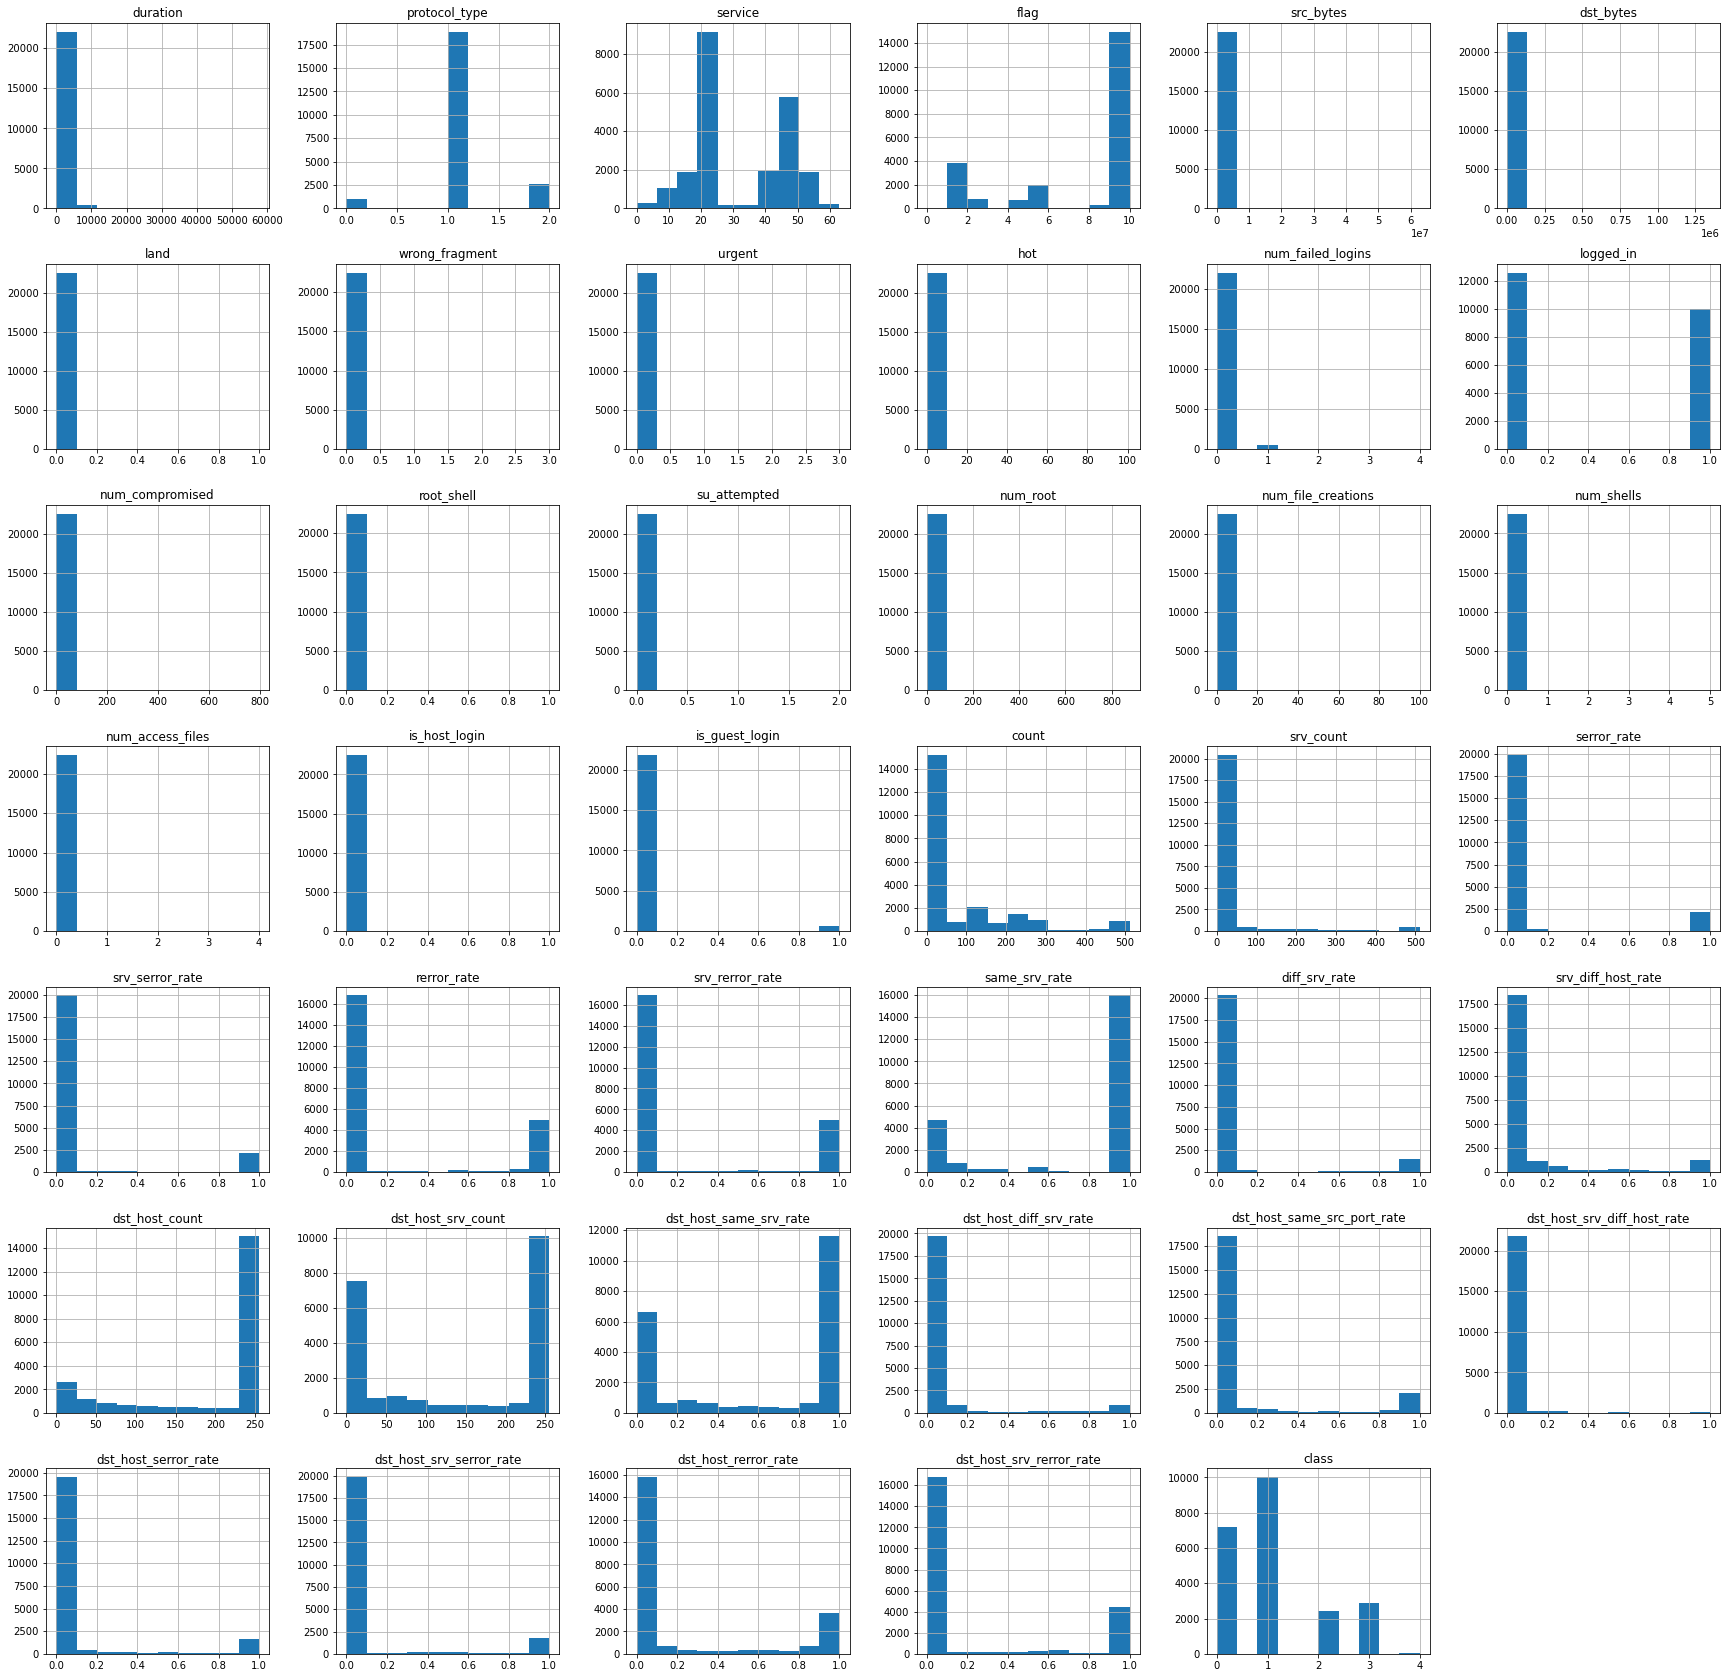

In [206]:
visualize(df)

In [207]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,2
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,2


In [336]:
data = df.to_numpy()
X = data[:,0:-1]
y = data[:,-1]

In [303]:
def get_bestusingkbest(X,y,k,f):
    test = SelectKBest(score_func=f, k=k)
    fit = test.fit(X, y)
    np.set_printoptions(precision=2)
    indices = np.argsort(fit.scores_)[::-1]
    # To get your top 10 feature names
    features = []
    for i in range(k):
        features.append(df.columns[indices[i]])
    
    X = X[:, [i for i in indices]]
    # Now plot
    plt.figure()
    plt.barh(features, fit.scores_[indices[range(k)]], color='r', align='center')
    plt.show()
    return X,y


In [304]:
def getbyrandomforest(k,df,class_name):
    drop_cols=[class_name]
    X = df.drop(drop_cols, axis = 1)
    y = df[class_name]
    rf_model = RandomForestClassifier()
    rf_model.fit(X,y)
    feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    df_imp_feat = feat_importances.nlargest(k)
    df_imp_feat.plot(kind='barh')
    plt.show()
    selected = []
    for y,z in df_imp_feat.items():
        selected.append(y)
    X = X[selected]  
    return X,y
    


In [305]:
def correlationmethod(k,df,class_name):
    df_corr = df.corr()[class_name].sort_values(ascending=False).head(k)
    top_corr_features = df_corr.index
    df_corr.plot(kind='barh')
    plt.show()
    print(df_corr)
    X = df[top_corr_features]
    y = X[class_name]
    X = X.drop(class_name,axis = 1)
    return X,y

In [329]:
def getmutual_infoclassif(df,X,y,class_name,k):
    importance = mutual_info_classif(X,y)
    feature_importance = pd.Series(importance,df.columns[0:len(df.columns)-1]).sort_values(ascending=False).head(k)
    feature_importance.plot(kind = 'barh',color='teal')
    print(feature_importance)
    selected = []
    for y,z in feature_importance.items():
        selected.append(y)
    X = df.drop(class_name,axis = 1)
    X = X[selected]  
    plt.show()
    return X,y

In [343]:
def getfeatureby_exhaustive_search(X,y,df,min_,max_,class_name,f,kfold):
    efs = ExhaustiveFeatureSelector(f,min_features=min_,max_features=max_,scoring='f1_weighted',cv = kfold)
    efs.fit(X,y)
    selected_features = df.columns[list(efs.best_idx_)]
    print(selected_features)
    print(efs.best_score_)
    return selected_features,efs.best_score_

In [345]:
a,b = getfeatureby_exhaustive_search(X,y,df,15,30,'class',RandomForestClassifier(),10)

KeyboardInterrupt: 

src_bytes                      0.877173
dst_bytes                      0.700371
service                        0.624544
diff_srv_rate                  0.438785
count                          0.411078
dst_host_srv_count             0.410557
dst_host_diff_srv_rate         0.409487
dst_host_same_srv_rate         0.394554
flag                           0.389352
same_srv_rate                  0.368260
dst_host_rerror_rate           0.352278
dst_host_srv_rerror_rate       0.302156
rerror_rate                    0.266996
srv_rerror_rate                0.239322
duration                       0.216139
srv_count                      0.215321
logged_in                      0.215276
dst_host_srv_diff_host_rate    0.190233
dst_host_same_src_port_rate    0.176515
srv_diff_host_rate             0.171395
dtype: float64


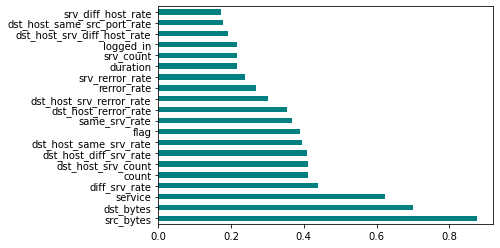

In [332]:
X,y = getmutual_infoclassif(df,X,y,'class',20)

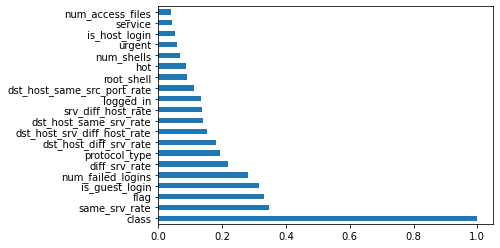

class                          1.000000
same_srv_rate                  0.346759
flag                           0.332351
is_guest_login                 0.315579
num_failed_logins              0.280085
diff_srv_rate                  0.217122
protocol_type                  0.194122
dst_host_diff_srv_rate         0.180817
dst_host_srv_diff_host_rate    0.151304
dst_host_same_srv_rate         0.138770
srv_diff_host_rate             0.136457
logged_in                      0.134049
dst_host_same_src_port_rate    0.112639
root_shell                     0.090816
hot                            0.085238
num_shells                     0.068408
urgent                         0.057232
is_host_login                  0.052049
service                        0.042847
num_access_files               0.037794
Name: class, dtype: float64
(22544, 19) (22544,)


In [306]:
X,y = correlationmethod(20,df,'class')
print(X.shape,y.shape)

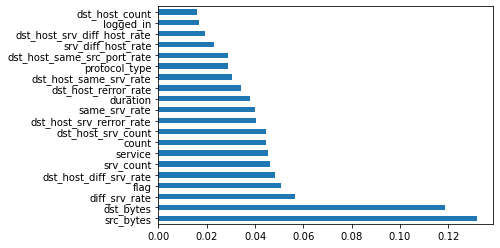

In [281]:
X,y = getbyrandomforest(20,df,'class')

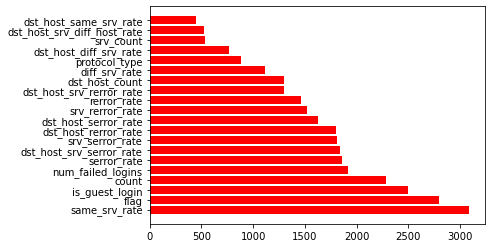

In [218]:
X,y = get_bestusingkbest(X,y,20,f_regression)

src_bytes                      0.134172
dst_bytes                      0.097385
diff_srv_rate                  0.068062
flag                           0.059352
count                          0.054616
service                        0.049537
same_srv_rate                  0.042047
dst_host_srv_count             0.041714
duration                       0.041709
dst_host_srv_rerror_rate       0.041434
dst_host_diff_srv_rate         0.040372
srv_count                      0.040361
dst_host_same_srv_rate         0.032371
dst_host_rerror_rate           0.029937
protocol_type                  0.027670
logged_in                      0.027113
dst_host_same_src_port_rate    0.026185
srv_diff_host_rate             0.021148
dst_host_count                 0.018200
dst_host_srv_diff_host_rate    0.015672
dtype: float64


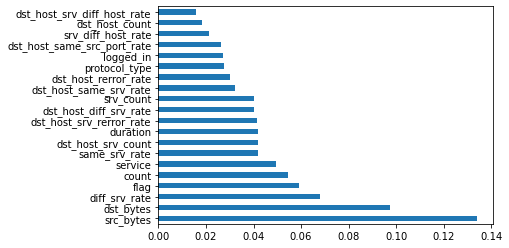

In [141]:
features = fit.transform(X)
print(features[0:5,:])

[[0.0 0.0 1.0 1.0]
 [0.0 0.0 1.0 1.0]
 [0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0]
 [0.0 0.0 0.83 0.71]]


In [ ]:
# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])